# preprocessing

In [169]:
import pandas as pd

In [170]:
track = pd.read_csv('samsung/Track2.csv', index_col = False, encoding='cp949')

track['유아자녀스코어'] = track['유아자녀스코어'].replace('high',2).replace('mid',1).replace('low', 0)
track['초등학생자녀스코어'] = track['초등학생자녀스코어'].replace('high',2).replace('mid',1).replace('low', 0)
track['중고생자녀스코어'] = track['중고생자녀스코어'].replace('high',2).replace('mid',1).replace('low', 0)
track['대학생자녀스코어'] = track['대학생자녀스코어'].replace('high',2).replace('mid',1).replace('low', 0)
track['자녀스코어'] = track['유아자녀스코어'] + track['초등학생자녀스코어'] + track['중고생자녀스코어'] + track['대학생자녀스코어']

track['기혼스코어'] = track['기혼스코어'].replace('high',2).replace('mid',1).replace('low', 0)

track['전업주부스코어'] = track['전업주부스코어'].replace('high',2).replace('mid',1).replace('low', 0)
track['연령대'] = track['연령대'].replace('C',2).replace('B',1).replace('A', 0).replace('D', 3).replace('E', 4).replace('F', 5).replace('G', 6).replace('H', 7)

track['YM_year']  = track['YM']
track['YM_year'] = track['YM_year'].replace(202005,2020).replace(202004,2020).replace(201905,2019).replace(201904,2019)

track['YM_month'] = track['YM']
track['YM_month'] = track['YM_month'].replace(202005,5).replace(202004,4).replace(201905,5).replace(201904,4)

track['year-month'] = track['YM_year'].astype(str)  + '-' + track['YM_month'].astype(str)


print(track.shape)
track.head()

(452038, 14)


,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,자녀스코어,YM_year,YM_month,year-month
0,202005,할인점,0,5,2,0,2,1,0,0,3,2020,5,2020-5
1,202005,취미,0,1,2,0,1,1,0,0,2,2020,5,2020-5
2,202005,오픈마켓/소셜,1,3,1,1,1,1,0,1,3,2020,5,2020-5
3,202005,뷰티,0,3,1,1,1,1,0,0,3,2020,5,2020-5
4,202005,오픈마켓/소셜,0,6,2,0,1,1,1,0,3,2020,5,2020-5


In [171]:
high_count = track[((track['Category'] == '할인점') | (track['Category'] == '오픈마켓/소셜') | (track['Category'] == '디저트') |(track['Category'] == '전문몰'))]
low_count = track[((track['Category'] == '취미') | (track['Category'] == '뷰티') | (track['Category'] == '종합몰'))]
extrem_low = track[((track['Category'] == '항공/여행사') | (track['Category'] == '호텔/숙박') | (track['Category'] == '면세점'))]

# EDA

In [172]:
import seaborn as sns

In [173]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')

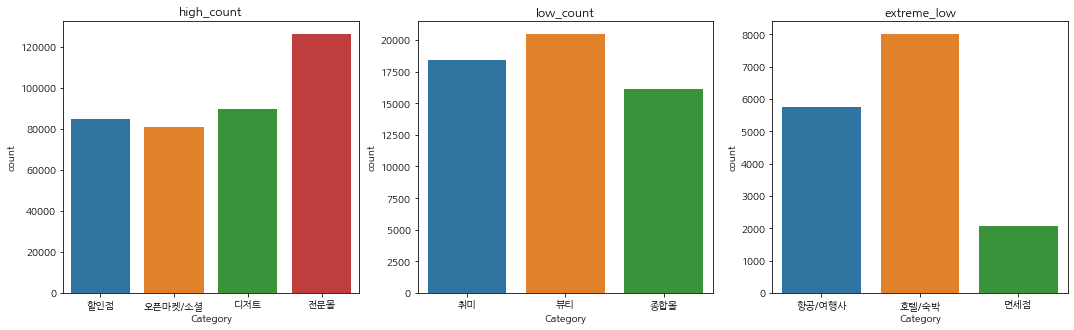

In [175]:
figure, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)

figure.set_size_inches(18,5)
ax1.set_title("high_count")
ax2.set_title("low_count")
ax3.set_title("extreme_low")

sns.countplot(data = high_count, x = 'Category', ax = ax1)
sns.countplot(data = low_count, x = 'Category', ax = ax2)
sns.countplot(data = extrem_low, x = 'Category', ax = ax3)

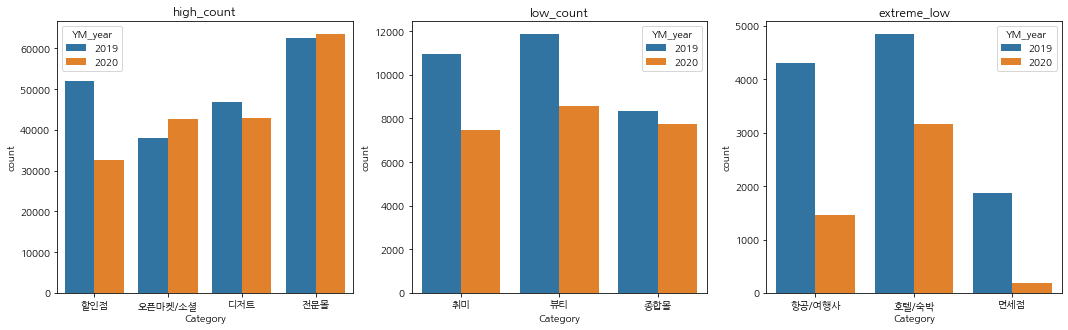

In [176]:
figure, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)

figure.set_size_inches(18,5)
ax1.set_title("high_count")
ax2.set_title("low_count")
ax3.set_title("extreme_low")

sns.countplot(data = high_count, x = 'Category', hue = 'YM_year', ax = ax1)
sns.countplot(data = low_count, x = 'Category', hue = 'YM_year', ax = ax2)
sns.countplot(data = extrem_low, x = 'Category', hue = 'YM_year', ax = ax3)

# 온라인 업종은 19년도에 비해 카드 사용량이 증가하거나 감소 폭이 적다.
# 오프라인 업종의 경우 모든 업종에서 카드 사용량이 감소
# 디저트 업종의 경우, 다른 오프라인 업종에 비해 감소폭이 적다는 점이 특징이다.

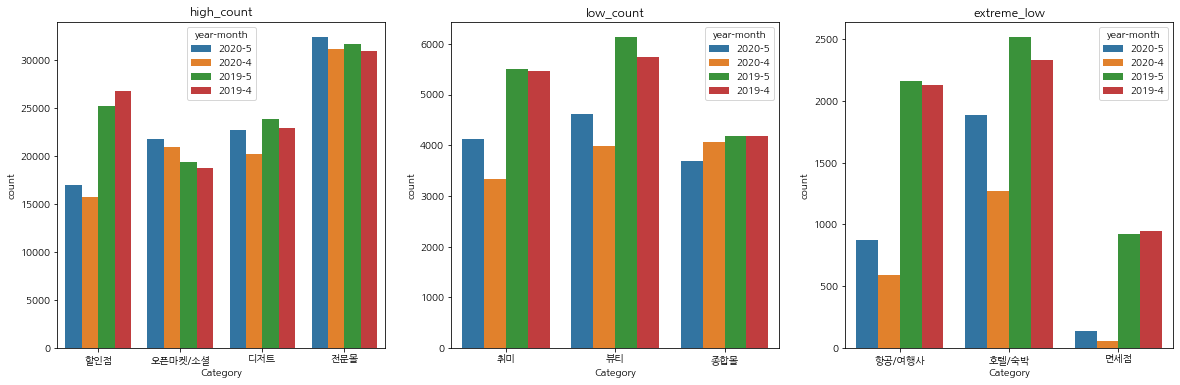

In [177]:
figure, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)

figure.set_size_inches(20,6)
ax1.set_title("high_count")
ax2.set_title("low_count")
ax3.set_title("extreme_low")

sns.countplot(data = high_count, x = 'Category', hue = 'year-month', ax = ax1)
sns.countplot(data = low_count, x = 'Category', hue = 'year-month', ax = ax2)
sns.countplot(data = extrem_low, x = 'Category', hue = 'year-month', ax = ax3)

# 종합몰을 제외한 모든 업종에서 20년 4월에 비해 20년 5월에 카드 사용량이 증가
# 종합몰에서만 감소한 이유는 코로나 확산세가 수그러듬 / 정부의 재난지원금의 효과

## 할인점

In [181]:
할인점 = track[track['Category'] == '할인점']

print(할인점.shape)
할인점.head()

(84636, 14)


,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,자녀스코어,YM_year,YM_month,year-month
0,202005,할인점,0,5,2,0,2,1,0,0,3,2020,5,2020-5
21,202005,할인점,1,1,2,0,2,1,1,1,4,2020,5,2020-5
37,202005,할인점,0,5,2,0,1,1,0,0,2,2020,5,2020-5
42,202005,할인점,0,5,2,0,1,1,0,0,2,2020,5,2020-5
51,202005,할인점,1,0,2,1,0,2,0,1,3,2020,5,2020-5


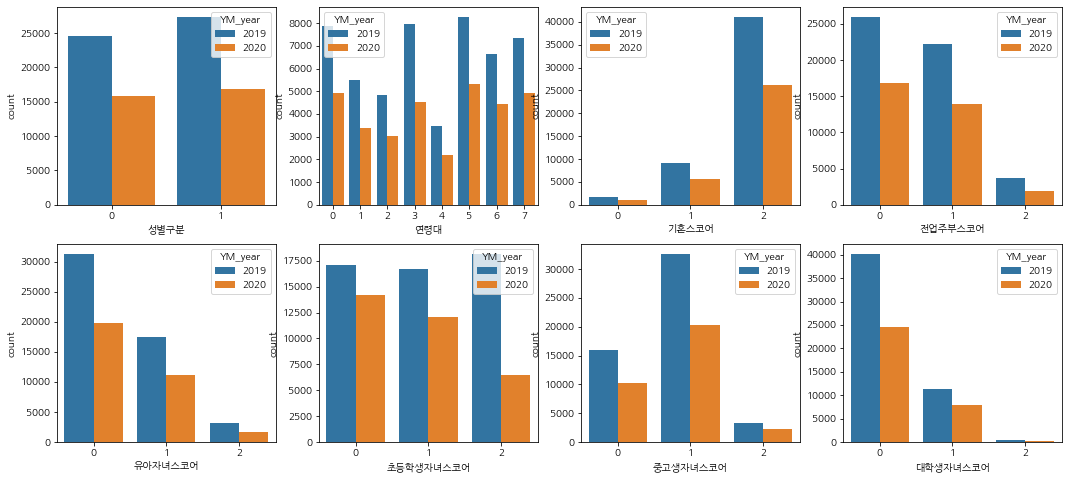

In [190]:
figure, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(nrows = 2, ncols = 4)

figure.set_size_inches(18,8)




sns.countplot(data = 할인점 , x = '성별구분', hue = 'YM_year', ax = ax1)
sns.countplot(data = 할인점 , x = '연령대', hue = 'YM_year', ax = ax2)
sns.countplot(data = 할인점 , x = '기혼스코어', hue = 'YM_year', ax = ax3)
sns.countplot(data = 할인점 , x = '유아자녀스코어', hue = 'YM_year', ax = ax5)
sns.countplot(data = 할인점 , x = '초등학생자녀스코어', hue = 'YM_year', ax = ax6)
sns.countplot(data = 할인점 , x = '중고생자녀스코어', hue = 'YM_year', ax = ax7)
sns.countplot(data = 할인점 , x = '대학생자녀스코어', hue = 'YM_year', ax = ax8)
sns.countplot(data = 할인점 , x = '전업주부스코어', hue = 'YM_year', ax = ax4)


In [198]:
pd.crosstab([할인점['Category'],할인점['YM_year']], 할인점['연령대']).round(3)

연령대                   0      1      2      3      4      5      6      7  \
Category YM_year                                                           
할인점      2019     0.093  0.065  0.057  0.094  0.041  0.098  0.079  0.087   
         2020     0.058  0.040  0.036  0.054  0.026  0.063  0.052  0.058   
All               0.151  0.105  0.093  0.148  0.067  0.161  0.131  0.145   

연령대                 All  
Category YM_year         
할인점      2019     0.614  
         2020     0.386  
All               1.000

## HIGH_COUNT

In [ ]:
sns.countplot(data = hi_count, x = 'Category', hue = '성별구분')

In [ ]:
plt.figure(figsize = (20,5))

sns.countplot(data = hi_count, x = 'Category', hue = 'YM_year')

In [ ]:
plt.figure(figsize = (20,5))

sns.countplot(data = hi_count, x = 'Category', hue = 'YM_month')

In [ ]:
plt.figure(figsize = (20,5))

sns.countplot(data = hi_count, x = 'Category', hue = 'year-month')

In [ ]:
plt.figure(figsize=(15,5))

sns.countplot(data = hi_count, x = 'Category', hue = '기혼스코어')

In [ ]:
plt.figure(figsize=(15,5))

sns.countplot(data = hi_count, x = 'Category', hue = '유아자녀스코어')

In [ ]:
plt.figure(figsize=(15,5))

sns.countplot(data = hi_count, x = 'Category', hue = '초등학생자녀스코어')

In [ ]:
plt.figure(figsize=(15,5))

sns.countplot(data = hi_count, x = 'Category', hue = '중고생자녀스코어')

In [ ]:
plt.figure(figsize=(15,5))

sns.countplot(data = hi_count, x = 'Category', hue = '대학생자녀스코어')

In [ ]:
plt.figure(figsize=(15,5))

sns.countplot(data = hi_count, x = 'Category', hue = '전업주부스코어')

In [ ]:
plt.figure(figsize=(15,5))

sns.countplot(data = hi_count, x = 'Category', hue = '연령대')

In [ ]:
plt.figure(figsize=(15,5))

sns.countplot(data = track, x = '기혼스코어', hue = '유아자녀스코어')

In [ ]:
plt.figure(figsize=(15,5))

sns.countplot(data = track, x = '기혼스코어', hue = '초등학생자녀스코어')

In [ ]:
plt.figure(figsize=(15,5))

sns.countplot(data = track, x = '기혼스코어', hue = '중고생자녀스코어')

In [ ]:
plt.figure(figsize=(15,5))

sns.countplot(data = track, x = '기혼스코어', hue = '대학생자녀스코어')

In [ ]:
plt.figure(figsize=(15,5))

sns.countplot(data = track, x = '기혼스코어', hue = '전업주부스코어')

## LOW_COUNT

In [ ]:
plt.figure(figsize = (20,5))

sns.countplot(data = lo_count, x = 'Category')

In [ ]:
plt.figure(figsize = (20,5))

sns.countplot(data = lo_count, x = 'Category', hue = '성별구분')

In [ ]:
plt.figure(figsize = (20,5))

sns.countplot(data = lo_count, x = 'Category', hue = '기혼스코어')

In [ ]:
plt.figure(figsize = (20,5))

sns.countplot(data = lo_count, x = 'Category', hue = '연령대')

In [ ]:
plt.figure(figsize = (20,5))

sns.countplot(data = lo_count, x = 'Category', hue = 'YM_year')

In [ ]:
plt.figure(figsize = (20,5))

sns.countplot(data = lo_count, x = 'Category', hue = 'YM_month')

In [ ]:
plt.figure(figsize = (20,5))

sns.countplot(data = lo_count, x = 'Category', hue = 'year-month')

## EXTREME_LOW

In [ ]:
sns.countplot(data = ex_low, x = 'Category')

In [ ]:
sns.countplot(data = ex_low, x = 'Category', hue = '성별구분')

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(data = ex_low, x = 'Category', hue = '기혼스코어')

In [ ]:
sns.countplot(data = ex_low, x = 'Category', hue = 'YM_year')

In [ ]:
sns.countplot(data = ex_low, x = 'Category', hue = 'YM_month')

In [ ]:
sns.countplot(data = ex_low, x = 'Category', hue = 'year-month')